### Summary

Data Visualization Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\paoma\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Read dataset to be used

In [3]:
df = pd.read_csv("retail_sales_dataset.csv")

df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


Omit Transaction ID because it represents indexes only. Use Customer ID instead for specific instances

In [4]:
df = df.drop(['Transaction ID'], axis=1)

### Question: Which date has the highest amount of sales?

In [32]:
# create seperate data to calculate total amount per day
df_sum = df.sort_values(by="Date")

df_sum = df_sum.drop(df.columns[1:7:], axis=1)

df_sum = df_sum.groupby(["Date"], as_index=False).sum()

df_sum

,Date,Total Amount
0,2023-01-01,3600
1,2023-01-02,1765
2,2023-01-03,600
3,2023-01-04,1240
4,2023-01-05,1100
...,...,...
340,2023-12-27,700
341,2023-12-28,2075
342,2023-12-29,3400
343,2023-12-31,50


Data spans for 1 year from 2023-01-01 to 2023-01-01

c:\Users\paoma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\paoma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='Total Amount'>

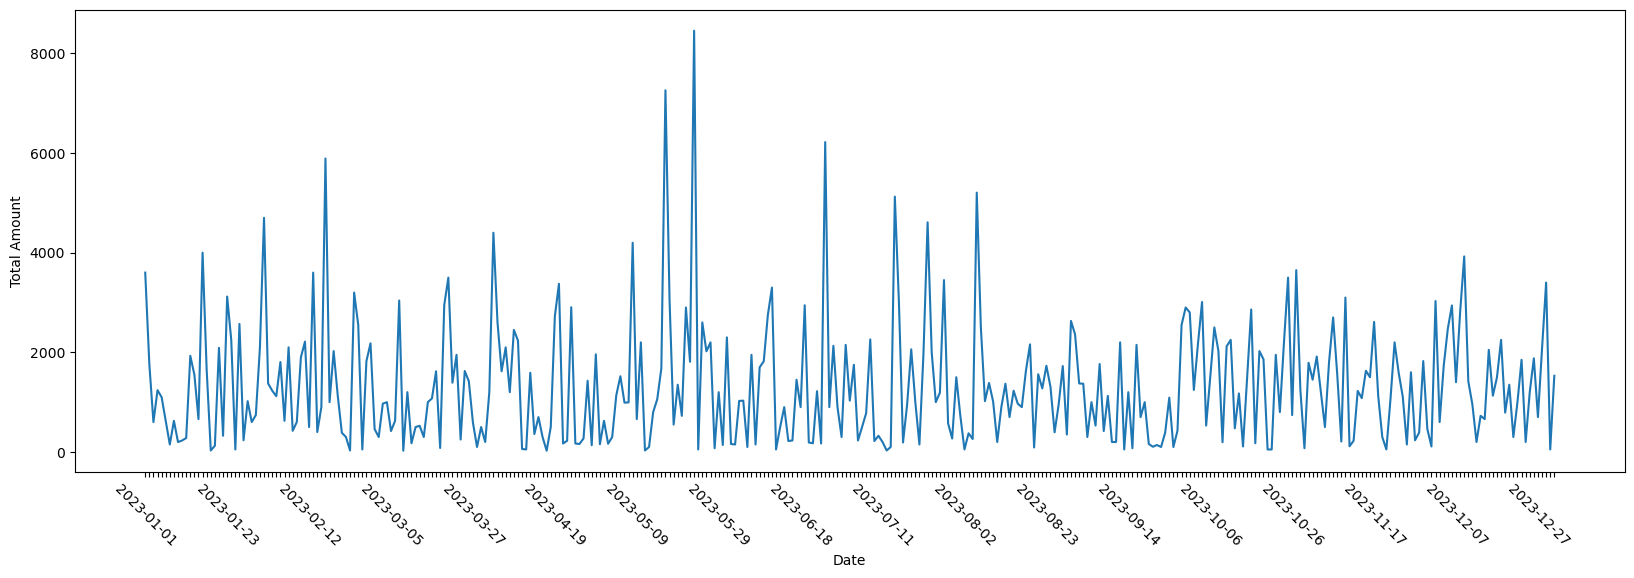

In [45]:
# plot data to visualize total amount trend over time
plt.figure(figsize=(20,6))
plt.xticks(rotation=-45)

line = sns.lineplot(data=df_sum, x="Date", y="Total Amount")

for i, label in enumerate(line.get_xticklabels()):
    if i % 20 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)
    
line

In [56]:
# find maximum total amount and its corresponding value
highest_total_amount_index = df_sum.idxmax()["Total Amount"]

df_sum.loc[highest_total_amount_index]

Date            2023-05-23
Total Amount          8455
Name: 134, dtype: object

Based on the graph, May is the month with the highest amount of revenue

### Question: Which gender spends the most?

In [11]:
df_gend = pd.DataFrame(df["Gender"])

df_gend["Total Amount"] = df["Total Amount"]

df_gend

,Gender,Total Amount
0,Male,150
1,Female,1000
2,Male,30
3,Male,500
4,Male,100
...,...,...
995,Male,50
996,Male,90
997,Female,100
998,Female,150


In [12]:
df_gend = df_gend.groupby(["Gender"], as_index=False).sum()

df_gend

,Gender,Total Amount
0,Female,232840
1,Male,223160


([<matplotlib.patches.Wedge at 0x1da85d47250>,
 [Text(-0.03667268363901098, 1.0993885183476828, 'Female'),
  Text(0.03667268363901109, -1.0993885183476828, 'Male')],
 [Text(-0.020003281984915078, 0.5996664645532814, '51.06%'),
  Text(0.020003281984915137, -0.5996664645532814, '48.94%')])

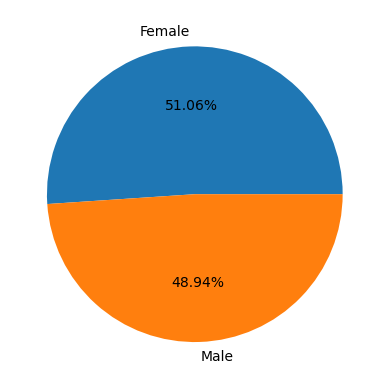

In [22]:
plt.pie(df_gend["Total Amount"], labels=df_gend["Gender"], autopct="%.2f%%")

Females spend more but it seems that both genders spend about the same amount generally.

### Question: Which age group spends the most?